## Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\KARTIK NEGI\Desktop\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.shape

(18249, 14)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
##Dropping uncessary columns

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## There are no missing values 

### FEATURE ANALYSIS:-

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
tt = df.nunique().to_frame('No. of unique values')
tt['type'] = df.dtypes.values
tt


,No. of unique values,type
Date,169,object
AveragePrice,259,float64
Total Volume,18237,float64
4046,17702,float64
4225,18103,float64
4770,12071,float64
Total Bags,18097,float64
Small Bags,17321,float64
Large Bags,15082,float64
XLarge Bags,5588,float64


## We can make an observation that the columns like type,region,year are categorical column as they have less than 10 unique values.Rest observations are stated below:-

The type column has 2 unique values and it is a categorical feature.
The year column, despite being numerical, is a Categorical feature that has 4 unique values.
The columns Average Price, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are numerical continuous data.

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

In [11]:
print(df["region"].value_counts())
print(df["region"].nunique())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [12]:
print(df["type"].value_counts())
print(df["type"].nunique())

conventional    9126
organic         9123
Name: type, dtype: int64
2


In [13]:
print(df["year"].value_counts())
print(df["year"].nunique())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64
4


## As given in the problem statement and using value_counts above we have made an observation that for region we will use classification model and for averageprice we will use regression models.

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## The dataset looks perfect as there are no negative/invalid values present.

In [15]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [16]:
df.head(6)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11


In [17]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
dtype: object

# DATA VISUALIZATION

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

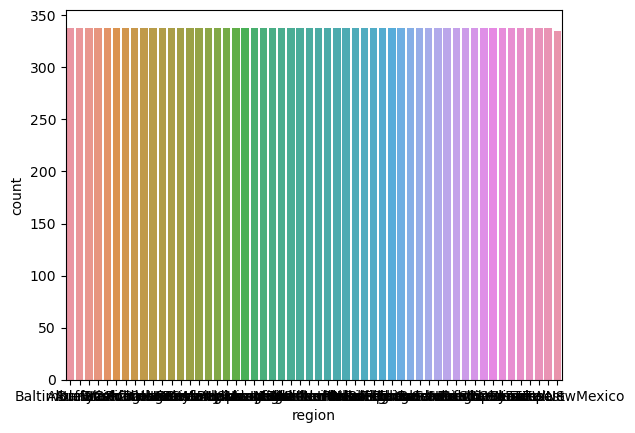

In [18]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


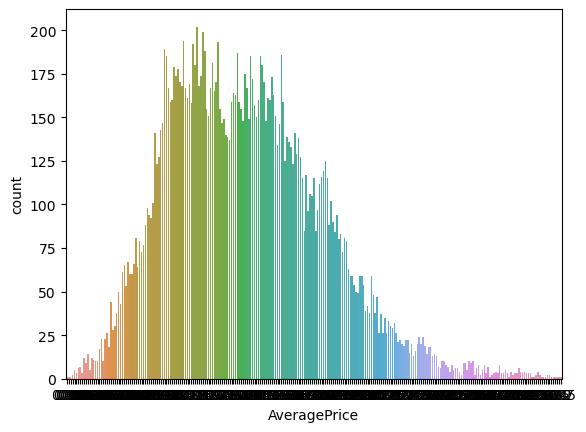

In [19]:
ax=sns.countplot(x='AveragePrice',data=df)
print(df['AveragePrice'].value_counts())

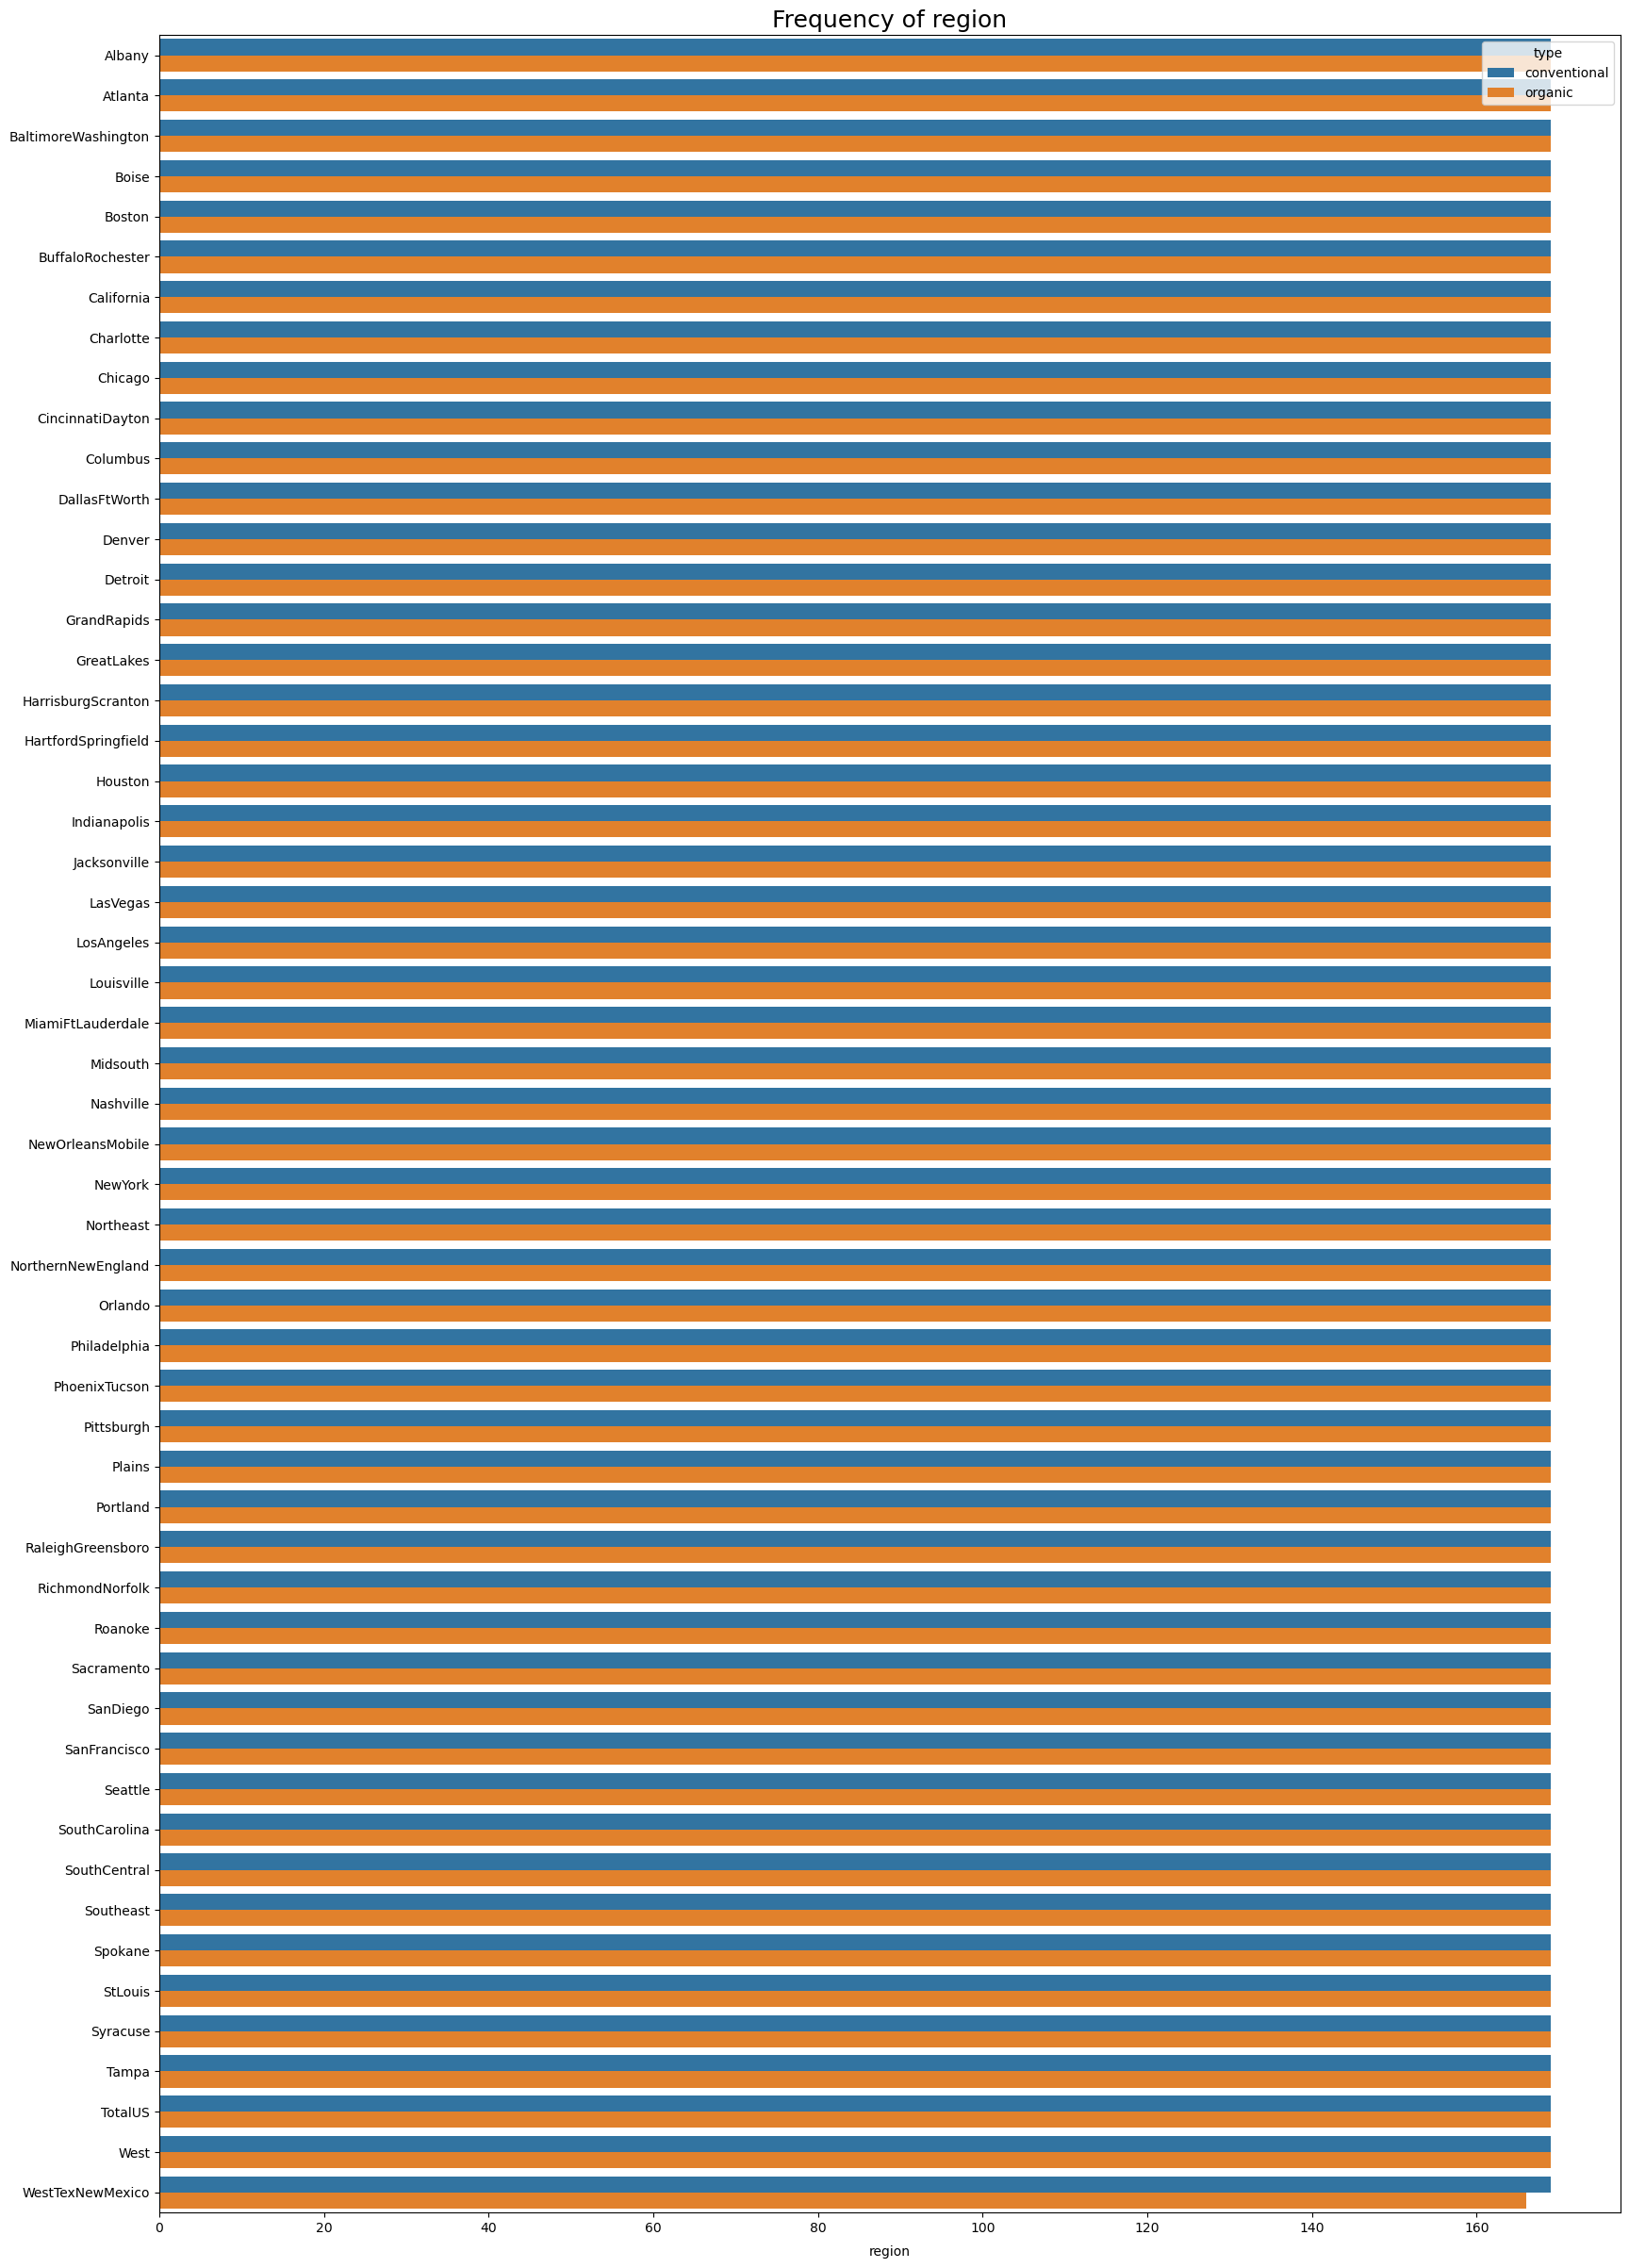

In [21]:
col = 'region'
plt.figure(figsize=(20, 30))
ax = sns.countplot(y=col, hue='type', data=df)

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=18, y=1);

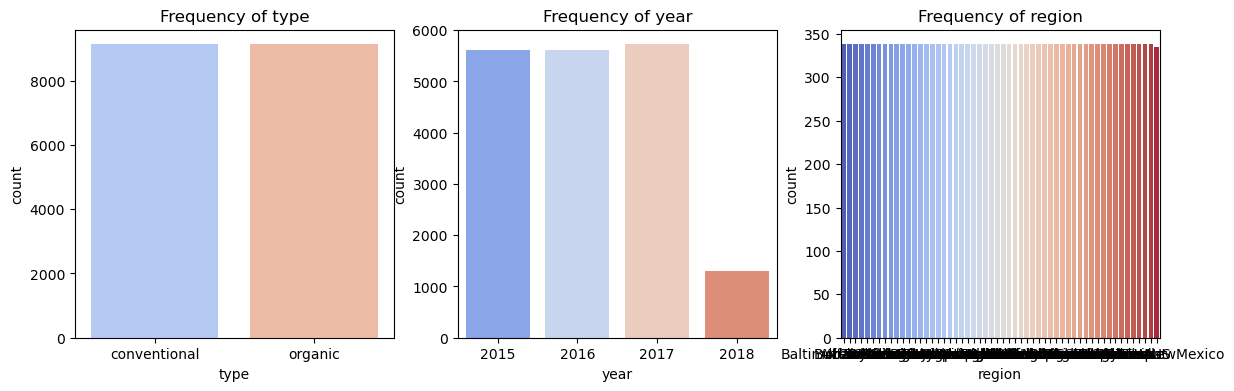

In [22]:
categorical_col = ['type', 'year','region']

# Visualize the categorical variables
fig, axs = plt.subplots(1,3, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='coolwarm')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [23]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

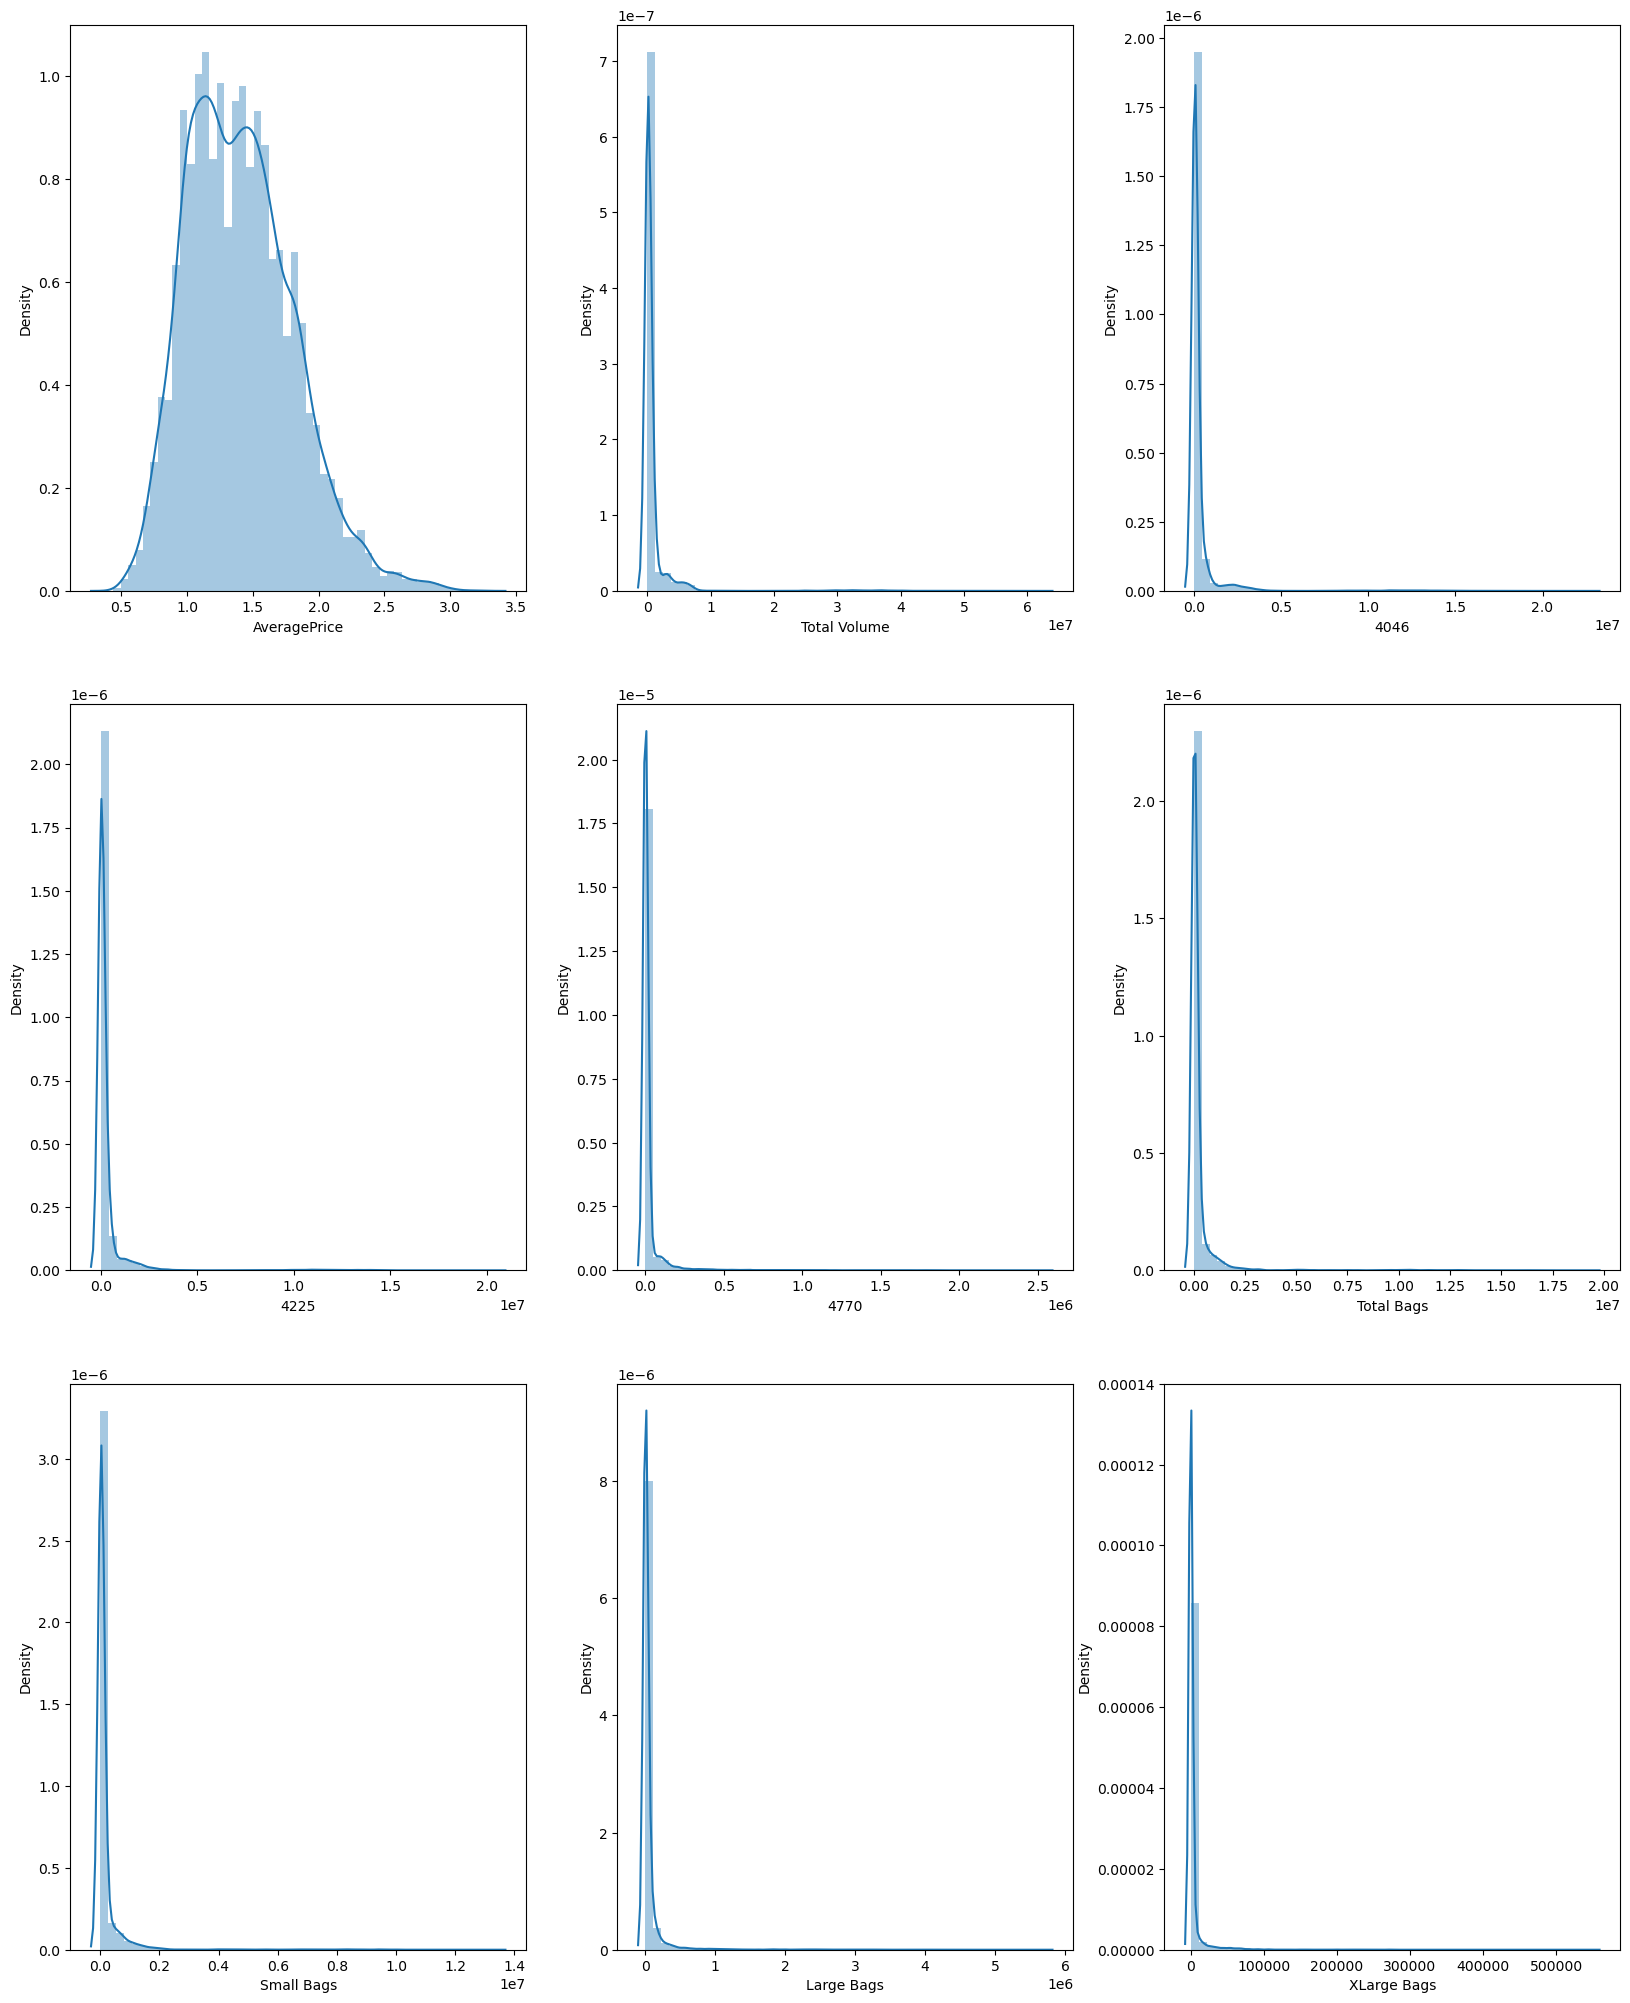

In [24]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# BIVARIATE ANALYSIS

In [25]:
price_by_date = df.groupby('Date').mean()['AveragePrice']
price_by_date

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

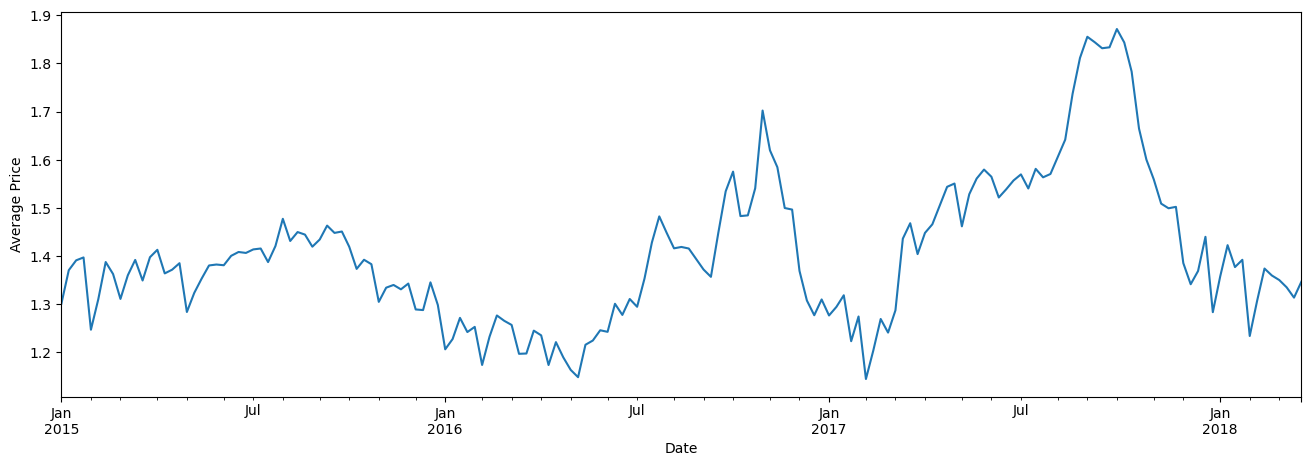

In [26]:
plt.figure(figsize=(16,5))

# Plot the average price over the time
price_by_date.plot()
plt.ylabel('Average Price');

### As we can see the average price tends to increase with peaks in seasons, for example in November 2016 and October 2017, and then tend to decrease aproximadely between 1.3 and 1.4 from January.

In [27]:
df_by_year_type = df.groupby(['year','type'], as_index=False).agg({'AveragePrice':'mean', 
                                                'Total Volume':'sum', 
                                                'Total Bags':'sum', 
                                                'Small Bags': 'sum',
                                                'Large Bags': 'sum',
                                                'XLarge Bags': 'sum'})
df_by_year_type

,year,type,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015,conventional,1.077963,4.296599e+09,7.481009e+08,6.194886e+08,1.231692e+08,5443128.28
1,2015,organic,1.673324,8.886943e+07,2.409134e+07,1.519414e+07,8.897192e+06,0.00
2,2016,conventional,1.105595,4.690250e+09,1.398101e+09,1.064426e+09,3.136371e+08,20038284.84
3,2016,organic,1.571684,1.306401e+08,6.505765e+07,4.206845e+07,2.298920e+07,0.00
4,2017,conventional,1.294888,4.766166e+09,1.541193e+09,1.145835e+09,3.713655e+08,23991658.41
5,2017,organic,1.735521,1.681399e+08,1.050962e+08,7.711715e+07,2.797352e+07,5513.93
6,2018,conventional,1.127886,1.334206e+09,4.593696e+08,3.344334e+08,1.177311e+08,7205184.07
7,2018,organic,1.567176,4.853227e+07,3.216630e+07,2.630799e+07,5.852903e+06,5407.80


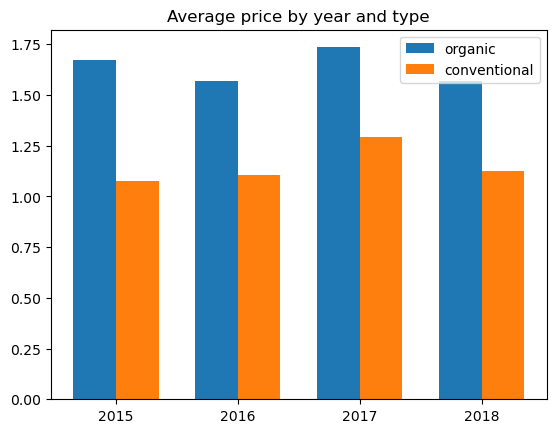

In [28]:
years = df['year'].unique()
n_years = np.arange(df['year'].nunique())
bar_width = 0.35
organic_by_year = df_by_year_type[df_by_year_type['type'] == 'organic']['AveragePrice']
conventional_by_year = df_by_year_type[df_by_year_type['type'] == 'conventional']['AveragePrice']

plt.bar( n_years, organic_by_year , bar_width, label = 'organic')
plt.bar( n_years + bar_width , conventional_by_year, bar_width, label = 'conventional')
plt.xticks( n_years + bar_width/2, years)
plt.title('Average price by year and type')
plt.legend()
plt.show()

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

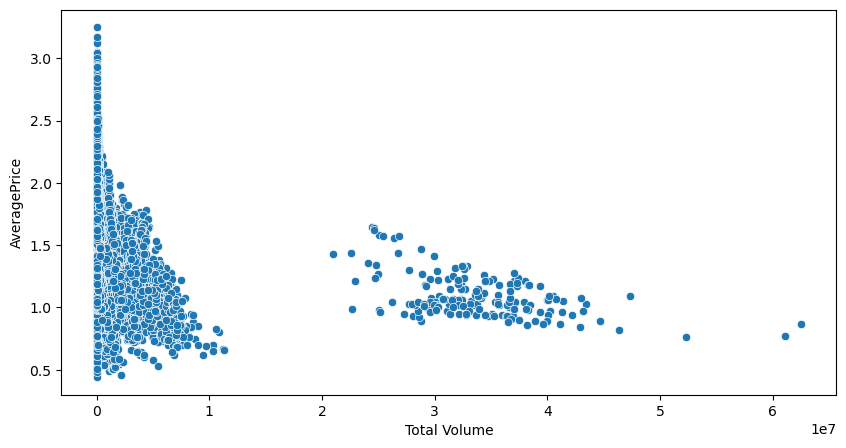

In [29]:
print(df['Total Volume'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df)

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

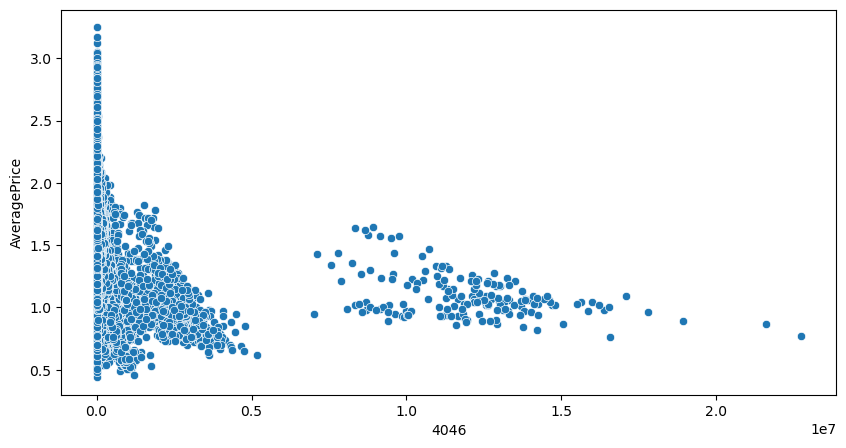

In [30]:
print(df['4046'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4046', y='AveragePrice', data=df)

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

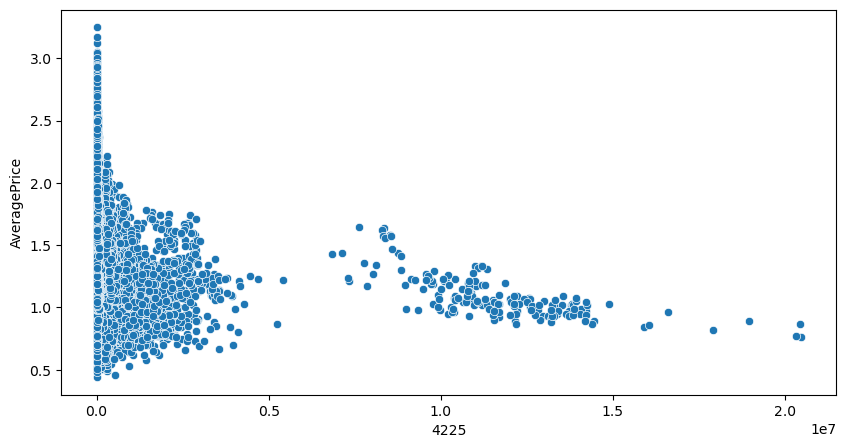

In [31]:
print(df['4225'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4225', y='AveragePrice', data=df)

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64


<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

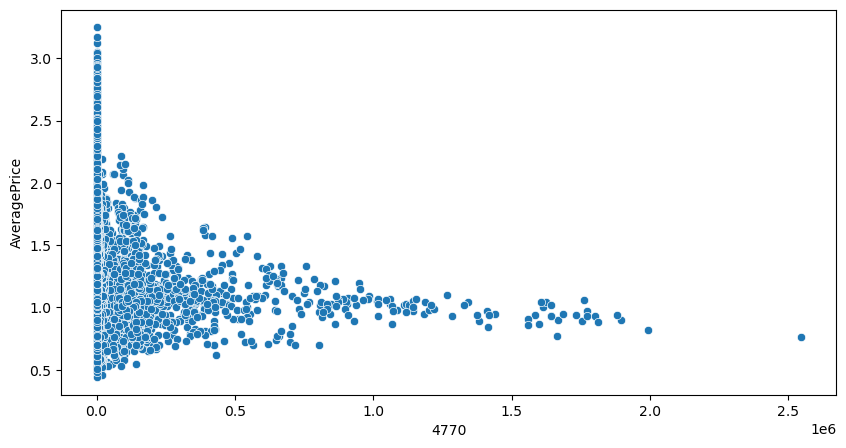

In [32]:
print(df['4770'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4770', y='AveragePrice', data=df)

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

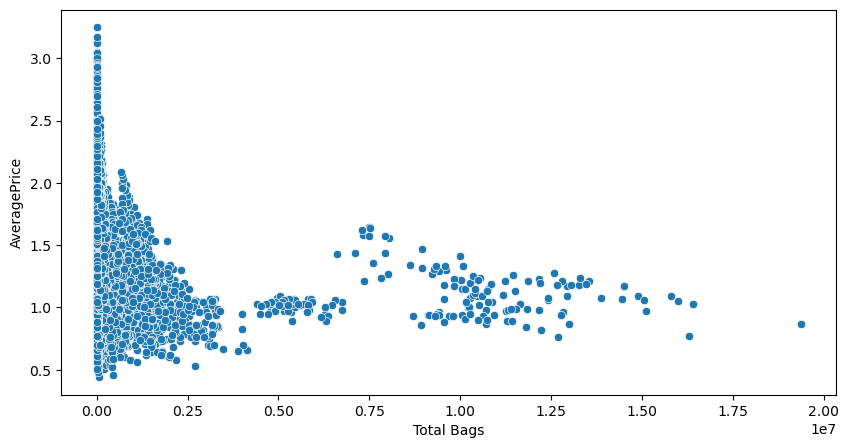

In [33]:
print(df['Total Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Bags', y='AveragePrice', data=df)

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

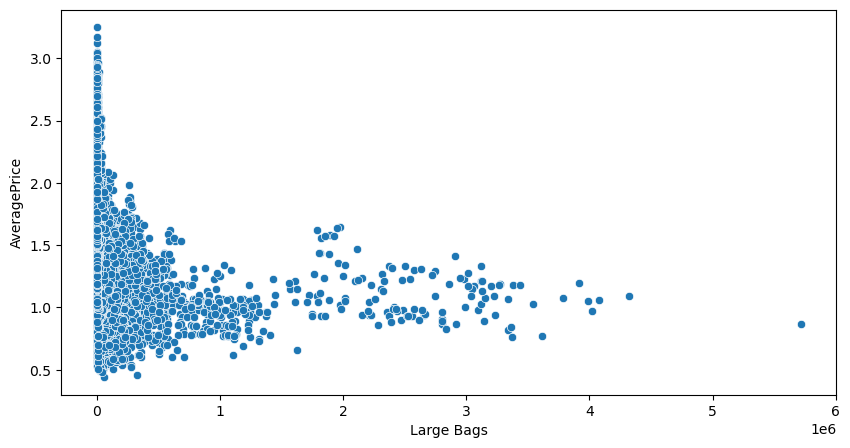

In [34]:
print(df['Large Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Large Bags', y='AveragePrice', data=df)

# MULTIVARIATE ANALYSIS

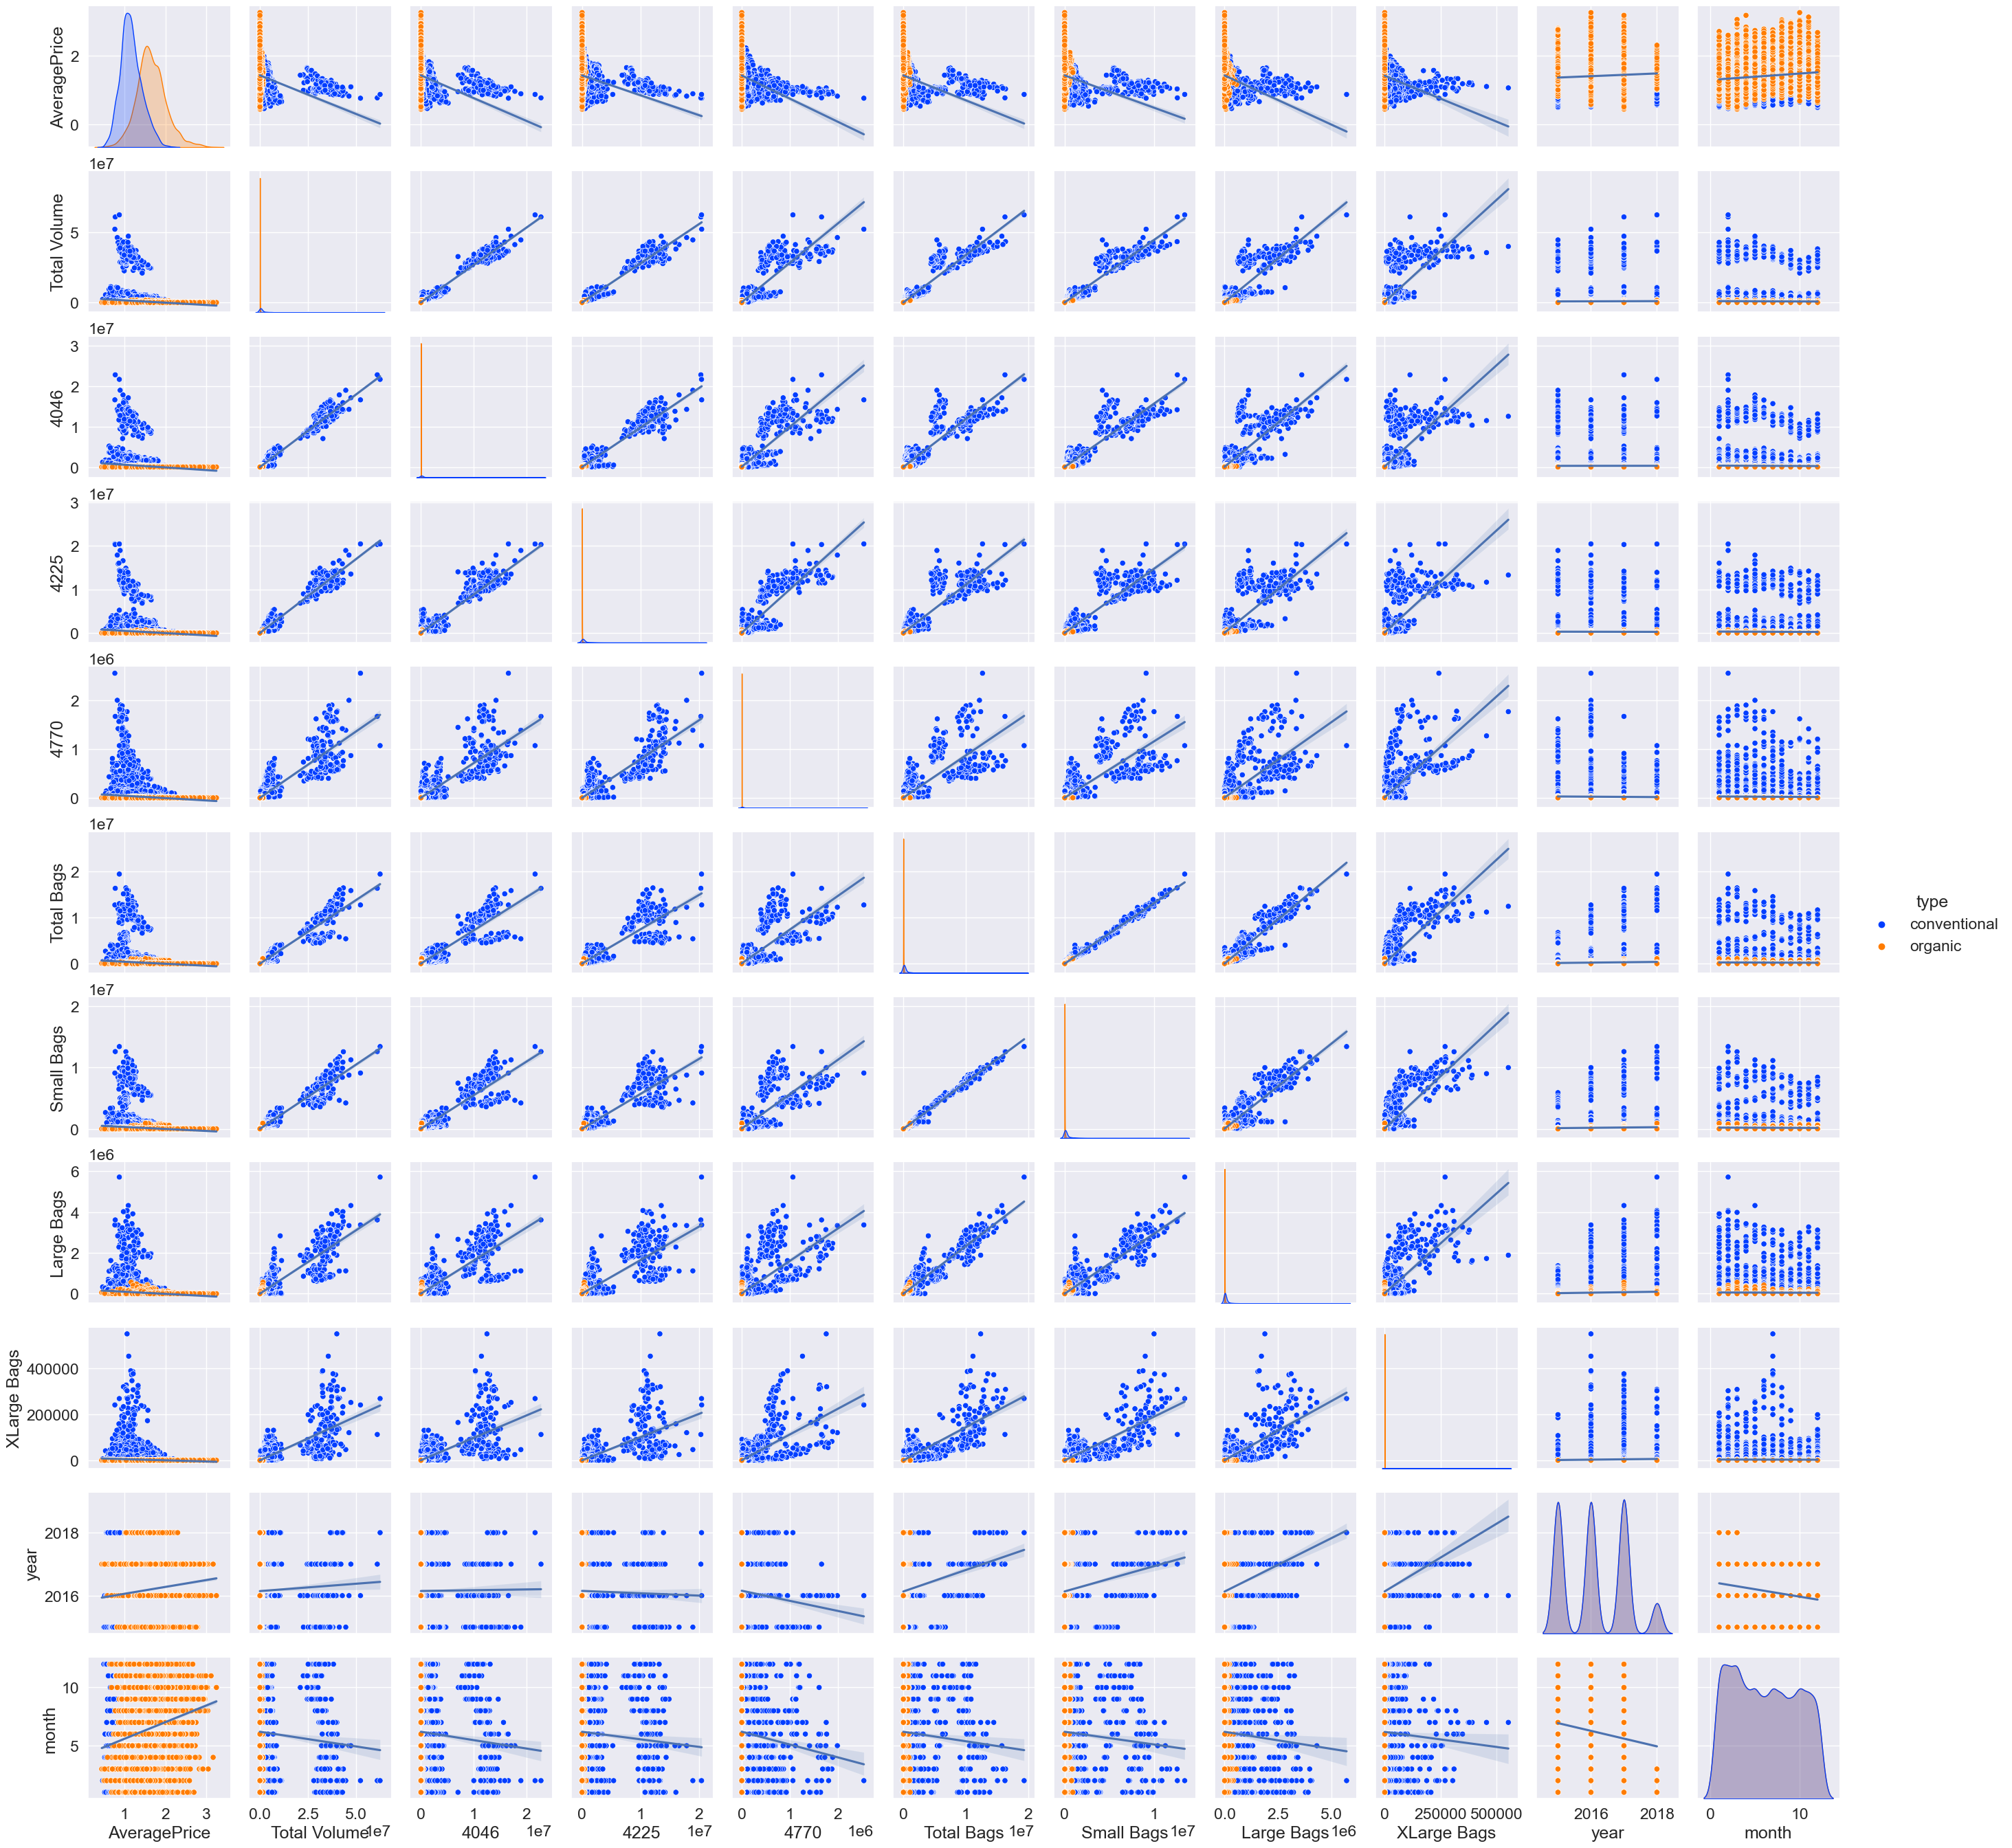

In [40]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='type', palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

# Encoding the categorical columns

In [35]:
df['type'].unique()
df['type'] = df['type'].map({'conventional': 1, 'organic': 2})
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany,11


In [54]:
# Encoding categorical column region using OrdinalEncoder and 
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df['Region'] = OE.fit_transform(df['region'].values.reshape(-1, 1))

display(df.head())
display(df.tail())

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany,12,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany,12,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany,12,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany,12,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany,11,0.0


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Region
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018,WestTexNewMexico,2,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018,WestTexNewMexico,1,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018,WestTexNewMexico,1,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018,WestTexNewMexico,1,53.0
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2,2018,WestTexNewMexico,1,53.0


## CHECKING THE DATASET AFTER THE TRANSFORMATION

In [40]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,Region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,0.162409,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,-0.024689,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,-0.025803,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,-0.022108,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,-0.033424,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,-0.022724,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,-0.023126,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,-0.020187,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,-0.012969,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000085,-0.000280


## CHECKING FOR OUTLIERS:-

In [45]:
df


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany,12,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany,12,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany,12,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany,12,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018,WestTexNewMexico,2,53.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018,WestTexNewMexico,1,53.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018,WestTexNewMexico,1,53.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018,WestTexNewMexico,1,53.0


In [51]:
df.drop("Date",axis=1,inplace=True)

In [55]:
df.drop('month',axis=1,inplace=True)

In [57]:
df.drop("region",axis=1,inplace=True)

In [59]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


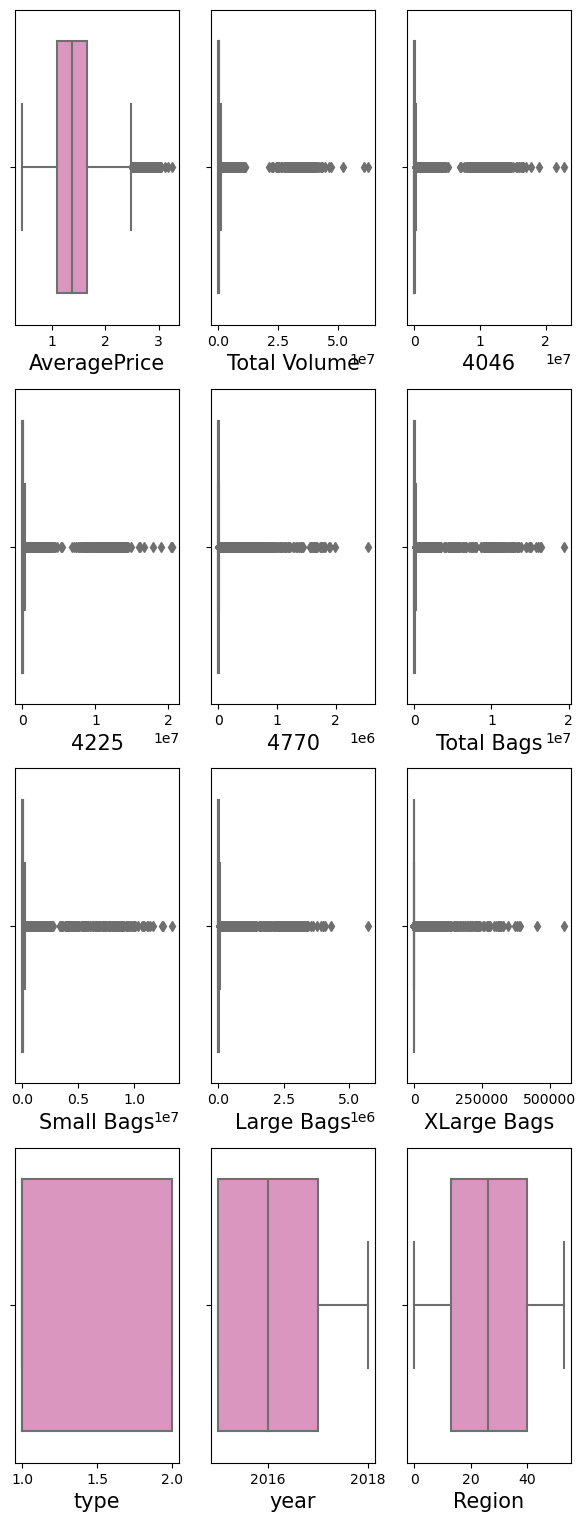

In [62]:
plt.figure(figsize = (6,30), facecolor = 'white')
plotnumber = 1
for i in df:
    if plotnumber <= 12:
        ax = plt.subplot(8,3, plotnumber)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i,fontsize = 15)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber += 1
plt.tight_layout()

### Observation:
    
- Outliers are present in all continuous columns: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.

- But we will not remove Outliers from 'AveragePrice'  column as it is Target column.

-  Outliers not present in all categorical columns: 'type', 'year' and 'region'.

## USING Z-SCORE METHOD WE WILL DETECT THE OUTLIERS

In [66]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
import pickle
import warnings
warnings.filterwarnings('ignore')

# using z score for target variable average price

In [67]:
variable = df[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z=np.abs(zscore(variable))

# Creating new dataframe for regression
avacado1 = df[(z<3).all(axis=1)]
avacado1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0.0


In [68]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",avacado1.shape)
print("Total Dropped rows:",df.shape[0]-avacado1.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


## Using z score for target variable Region

In [69]:
variable1 = df[[ 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

z1=np.abs(zscore(variable))

# Creating new dataframe for classification
avacado_study = df[(z1<3).all(axis=1)]
avacado_study.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0.0


In [71]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",avacado_study.shape)
print("Total Dropped rows:",df.shape[0]-avacado_study.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


# checking for skewness

In [75]:
avacado1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

In [76]:
avacado_study.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

## Observation: 

From analysing the graphical and non graphical analysis we have come to the following observations:-

1 The 'XLarge Bags' column data is highly skewed

2 All the columns are not normallly distributed

3 We will not remove skewness from 'AveragePrice' column when it is Target column but will remove when "region" is Target column

4 Also we will remove skewness from 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags' and these all column contains continuous data.

In [77]:
df.shape

(18249, 12)

In [78]:
avacado1.shape

(17782, 12)

In [80]:
avacado_study.shape

(17782, 12)

In [81]:
avacado1['XLarge Bags']=np.cbrt(avacado1['XLarge Bags'])
avacado1['Large Bags']=np.cbrt(avacado1['Large Bags'])
avacado1['4770']=np.cbrt(avacado1['4770'])

In [82]:
avacado1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            1.645148
Total Bags      4.082103
Small Bags      4.238647
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

In [83]:
avacado1['4046']=np.cbrt(avacado1['4046'])
avacado1['4225']=np.cbrt(avacado1['4225'])

In [84]:
avacado1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      4.082103
Small Bags      4.238647
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

In [85]:
avacado1['Total Volume']=np.cbrt(avacado1['Total Volume'])

In [87]:
avacado1.skew()

AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      4.082103
Small Bags      4.238647
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

In [88]:
avacado1['Total Bags']=np.cbrt(avacado1['Total Bags'])
avacado1['Small Bags']=np.cbrt(avacado1['Small Bags'])

In [89]:
avacado1.skew()

AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
Region          0.005773
dtype: float64

## SPLITTING DATA INTO FEATURES AND TARGET

In [ ]:
## WHEN TARGET VARIABLE IS "AVERAGE PRICE"

In [91]:
x=avacado1.drop("AveragePrice",axis=1)
y=avacado1["AveragePrice"]

In [92]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,1,2015,0.0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,1,2015,0.0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,1,2015,0.0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,1,2015,0.0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,1,2015,0.0


In [93]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [ ]:
## WHEN TARGET VARIABLE IS "REGION"

In [96]:
x1=avacado1.drop("Region",axis=1)
y1=avacado1["Region"]

In [97]:
x1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,1,2015
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,1,2015
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,1,2015
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,1,2015
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,1,2015


In [99]:
y1.tail()

18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: Region, dtype: float64

## Scaling the features for Modelling and Multicollinearity.

In [102]:
scaler = StandardScaler()

# Scaling data 
X = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
X


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,-0.354089,-0.705362,0.064883,-0.529798,-0.641895,-0.510944,-0.793364,-0.516326,-1.026443,-1.214908,-1.698613
1,-0.407704,-0.750850,-0.020407,-0.511952,-0.616418,-0.483999,-0.789373,-0.516326,-1.026443,-1.214908,-1.698613
2,-0.117703,-0.734240,0.411907,-0.423134,-0.660191,-0.530761,-0.784231,-0.516326,-1.026443,-1.214908,-1.698613
3,-0.279279,-0.695237,0.194527,-0.490150,-0.748403,-0.626226,-0.759214,-0.516326,-1.026443,-1.214908,-1.698613
4,-0.431455,-0.716127,-0.027893,-0.485656,-0.732897,-0.612407,-0.717298,-0.516326,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.728403,-0.618694,-0.861122,-0.800418,-0.508226,-0.377777,-0.615154,-0.516326,0.974238,1.979143,1.742552
17778,-0.773259,-0.689178,-0.736088,-0.800418,-0.623845,-0.499480,-0.655506,-0.516326,0.974238,1.979143,1.742552
17779,-0.775096,-0.689156,-0.792146,-0.131310,-0.619841,-0.485833,-0.855252,-0.516326,0.974238,1.979143,1.742552
17780,-0.740047,-0.658395,-0.760349,-0.131595,-0.573750,-0.437264,-0.843497,-0.516326,0.974238,1.979143,1.742552


In [130]:
scaler = StandardScaler()

# Scaling data 
T = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
T

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.212660,-0.354089,-0.705362,0.064883,-0.529798,-0.641895,-0.510944,-0.793364,-0.516326,-1.026443,-1.214908
1,-0.162942,-0.407704,-0.750850,-0.020407,-0.511952,-0.616418,-0.483999,-0.789373,-0.516326,-1.026443,-1.214908
2,-1.207026,-0.117703,-0.734240,0.411907,-0.423134,-0.660191,-0.530761,-0.784231,-0.516326,-1.026443,-1.214908
3,-0.834139,-0.279279,-0.695237,0.194527,-0.490150,-0.748403,-0.626226,-0.759214,-0.516326,-1.026443,-1.214908
4,-0.336956,-0.431455,-0.716127,-0.027893,-0.485656,-0.732897,-0.612407,-0.717298,-0.516326,-1.026443,-1.214908
...,...,...,...,...,...,...,...,...,...,...,...
17777,0.533114,-0.728403,-0.618694,-0.861122,-0.800418,-0.508226,-0.377777,-0.615154,-0.516326,0.974238,1.979143
17778,0.731987,-0.773259,-0.689178,-0.736088,-0.800418,-0.623845,-0.499480,-0.655506,-0.516326,0.974238,1.979143
17779,1.129733,-0.775096,-0.689156,-0.792146,-0.131310,-0.619841,-0.485833,-0.855252,-0.516326,0.974238,1.979143
17780,1.278888,-0.740047,-0.658395,-0.760349,-0.131595,-0.573750,-0.437264,-0.843497,-0.516326,0.974238,1.979143


## Checking for multicollinearity issues:-

#### Target Variable is AveragePrice

In [116]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,203.031121,Total Volume
1,24.892935,4046
2,40.501552,4225
3,3.309074,4770
4,117.809055,Total Bags
5,63.753815,Small Bags
6,9.051467,Large Bags
7,1.969640,XLarge Bags
8,2.193099,type
9,1.315035,year


In [117]:
X.drop('Total Volume', axis =1, inplace=True)

In [118]:
X

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,-0.705362,0.064883,-0.529798,-0.641895,-0.510944,-0.793364,-0.516326,-1.026443,-1.214908,-1.698613
1,-0.750850,-0.020407,-0.511952,-0.616418,-0.483999,-0.789373,-0.516326,-1.026443,-1.214908,-1.698613
2,-0.734240,0.411907,-0.423134,-0.660191,-0.530761,-0.784231,-0.516326,-1.026443,-1.214908,-1.698613
3,-0.695237,0.194527,-0.490150,-0.748403,-0.626226,-0.759214,-0.516326,-1.026443,-1.214908,-1.698613
4,-0.716127,-0.027893,-0.485656,-0.732897,-0.612407,-0.717298,-0.516326,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...
17777,-0.618694,-0.861122,-0.800418,-0.508226,-0.377777,-0.615154,-0.516326,0.974238,1.979143,1.742552
17778,-0.689178,-0.736088,-0.800418,-0.623845,-0.499480,-0.655506,-0.516326,0.974238,1.979143,1.742552
17779,-0.689156,-0.792146,-0.131310,-0.619841,-0.485833,-0.855252,-0.516326,0.974238,1.979143,1.742552
17780,-0.658395,-0.760349,-0.131595,-0.573750,-0.437264,-0.843497,-0.516326,0.974238,1.979143,1.742552


In [120]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,4.152934,4046
1,5.599198,4225
2,3.277474,4770
3,99.053695,Total Bags
4,63.693134,Small Bags
5,9.051434,Large Bags
6,1.956187,XLarge Bags
7,2.176532,type
8,1.314441,year
9,1.088865,Region


In [121]:
X.drop('Total Bags', axis =1, inplace=True)

In [122]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,4.152830,4046
1,5.475315,4225
2,3.277461,4770
3,6.539259,Small Bags
4,2.118193,Large Bags
5,1.936011,XLarge Bags
6,2.176305,type
7,1.309268,year
8,1.088620,Region


In [123]:
## Now we have the value of vif less than 10 so therefore after dropping some columns which is done above 
## we have got rid of the multicollinearity issues now we will proceed with modelling

## Target Variable is region

In [131]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(T.values,i) for i in range(len(T.columns))]
vif['Features'] = T.columns
vif

,VIF values,Features
0,1.981718,AveragePrice
1,203.974976,Total Volume
2,24.000494,4046
3,42.078730,4225
4,3.290925,4770
5,120.197907,Total Bags
6,66.419439,Small Bags
7,9.123587,Large Bags
8,1.976350,XLarge Bags
9,2.688487,type


In [132]:
T.drop('Total Volume', axis =1, inplace=True)

In [133]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(T.values,i) for i in range(len(T.columns))]
vif['Features'] = T.columns
vif

,VIF values,Features
0,1.929397,AveragePrice
1,4.058402,4046
2,5.874282,4225
3,3.256094,4770
4,104.322730,Total Bags
5,66.187401,Small Bags
6,9.122901,Large Bags
7,1.971368,XLarge Bags
8,2.687698,type
9,1.356296,year


In [128]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(T.values,i) for i in range(len(T.columns))]
vif['Features'] = T.columns
vif

In [129]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(T.values,i) for i in range(len(T.columns))]
vif['Features'] = T.columns
vif

,VIF values,Features
0,32.885888,AveragePrice
1,10.200505,4046
2,3.303572,4225
3,11.195704,Total Bags
4,2.683939,Small Bags
5,1.930427,Large Bags
6,2.191554,XLarge Bags
7,1.294628,type
8,1.061440,year


In [134]:
T.drop('Total Bags', axis =1, inplace=True)

In [135]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(T.values,i) for i in range(len(T.columns))]
vif['Features'] = T.columns
vif

,VIF values,Features
0,1.831537,AveragePrice
1,4.053412,4046
2,5.660258,4225
3,3.255303,4770
4,6.558394,Small Bags
5,2.213175,Large Bags
6,1.939511,XLarge Bags
7,2.666104,type
8,1.342678,year


In [ ]:
## Now we have the value of vif less than 10 so therefore after dropping some columns which is done above 
## we have got rid of the multicollinearity issues now we will proceed with modelling

## CREATING MODEL :-

### 1 FOR REGRESSION PROBLEM WHERE TARGET IS AVERAGE PRICE:-

## LINEAR REGRESSION

In [138]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [139]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.4676122307061069
Mean abs error:  0.22330109662859107
Mean squared error:  0.08480345842566431
Root Mean Squared Error:  0.291210333651923


## RANDOM FOREST AGGRESSOR

In [140]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8308508930081924
Mean abs error:  0.11281177444548572
Mean squared error:  0.026943574007237323
Root Mean Squared Error:  0.16414497862328084


## KNN REGRESSOR

In [141]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.806413548471266
Mean abs error:  0.12380880974695407
Mean squared error:  0.030836171566755763
Root Mean Squared Error:  0.17560231082407704


## CROSS VALIDATION :-

In [142]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.09924060520381814


In [144]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.2850601868634425


In [145]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : -0.01356407783119018


# Hyper Parameter Tuning

## The Random Forest Regressor with GridsearchCV

In [146]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [147]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [148]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=60)

In [149]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

83.08508930081923


In [151]:
#adjusted r2 score
lr.score(x_test,y_test)

0.4676122307061069

In [150]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Avacado_Regressor = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Avacado_Regressor

,Original,Predicted
0,1.14,1.194879
1,1.88,1.482213
2,1.34,1.229408
3,1.27,1.223432
4,1.54,1.609076
...,...,...
5330,1.08,1.242533
5331,2.61,2.343903
5332,1.26,1.413248
5333,1.55,1.605527


# 2. Classification Model where target variable is "Region"

In [153]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(T,y1,test_size=.30)

In [154]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 9), (12447,), (5335, 9), (5335,))

In [159]:
x.shape, y.shape


((17782, 10), (17782,))

## DECISION TREE CLASSIFIER:-

In [156]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7861293345829429
confusion_matrix: 
 [[90  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  3]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  0  0 ...  0 87  0]
 [ 0  2  2 ...  0  0 71]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       110
         1.0       0.65      0.65      0.65       104
         2.0       0.83      0.87      0.85        91
         3.0       0.79      0.83      0.81       100
         4.0       0.87      0.86      0.86       107
         5.0       0.73      0.80      0.76        89
         6.0       0.98      0.95      0.96        99
         7.0       0.85      0.79      0.82        97
         8.0       0.93      0.95      0.94       104
         9.0       0.82      0.84      0.83       113
        10.0       0.73      0.67      0.70       103
        11.0       0.81      0.92      0.86        97
        12.0       0.81      0.78      0.79        99
      

In [160]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9021555763823805
confusion_matrix: 
 [[96  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  1]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  0  0 ...  0 89  0]
 [ 0  0  1 ...  0  0 87]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       110
         1.0       0.83      0.71      0.77       104
         2.0       0.98      0.99      0.98        91
         3.0       0.92      0.88      0.90       100
         4.0       0.94      0.96      0.95       107
         5.0       0.78      0.90      0.84        89
         6.0       0.99      0.99      0.99        99
         7.0       0.92      0.94      0.93        97
         8.0       0.97      1.00      0.99       104
         9.0       0.89      0.92      0.90       113
        10.0       0.86      0.83      0.85       103
        11.0       0.88      0.94      0.91        97
        12.0       0.94      0.98      0.96        99
      

## KNN CLASSIFIER:-

In [158]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.790253045923149
[[93  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  1]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  0  0 ...  0 86  0]
 [ 0  2  0 ...  0  0 68]]
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       110
         1.0       0.57      0.57      0.57       104
         2.0       0.90      0.96      0.93        91
         3.0       0.67      0.81      0.73       100
         4.0       0.86      0.78      0.82       107
         5.0       0.68      0.78      0.72        89
         6.0       0.98      0.97      0.97        99
         7.0       0.68      0.89      0.77        97
         8.0       0.91      0.95      0.93       104
         9.0       0.62      0.70      0.66       113
        10.0       0.58      0.63      0.60       103
        11.0       0.74      0.93      0.82        97
        12.0       0.91      0.78      0.84        99
        13.0       0.59      0.58      0.59       106
        14.0   

## CROSS VALIDATION:-

In [165]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,T,y1,cv=5).mean())

CV score for Decision Tree Classifier:  0.5494853855244479


In [167]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,T,y1,cv=9).mean())

CV score for Random forest Classifier:  0.7799392427840129


In [168]:
print('CV score for KNN Classifier: ',cross_val_score(knn,T,y1,cv=9).mean())

CV score for KNN Classifier:  0.5906310892453464


In [ ]:
# calculating the scores 
score = cross_val_score(rfc,x1,y1,cv=100,scoring="accuracy").mean()
print("Cross Validation Score: ", score*100)
print("Mean Score :", score.mean()*100)
print("STD Score:", score.std())

### ROC-AUC Curve

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

In [ ]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Avacado_regions=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Avacado_regions